<h1>
    <center>
Reading/writing an image file

# Whats is openCV?

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code.

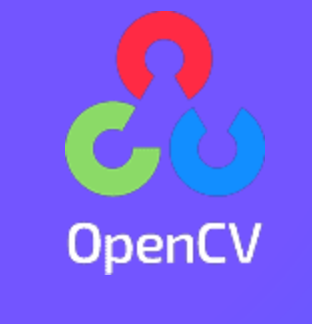

# Install openCV

pip install opencv-contrib-python

## import

Let's explore the anatomy of the representation of an image in OpenCV and NumPy. An image is a multidimensional array; it has columns and rows of pixels, and each pixel has a value. For different kinds of image data, the pixel value may be formatted in different ways. For example, we can create a 3x3 square black image from scratch by simply creating a 2D NumPy array:

Here, each pixel is represented by a single 8-bit integer, which means that the values for each pixel are in the 0-255 range, where 0 is black, 255 is white, and the in-between values are shades of gray. This is a grayscale image.

Let's now convert this image into blue-green-red (BGR) format using the `cv2.cvtColor` function:

As you can see, each pixel is now represented by a three-element array, with each integer representing one of the three color channels: B, G, and R, respectively. Other common color models, such as HSV, will be represented in the same way, albeit with different value ranges. For example, the hue value of the HSV color model has a range of 0-180.

You can check the structure of an image by inspecting the `.shape` property, which returns rows, columns, and the number of channels (if there is more than one).

Consider this example:

OpenCV provides the `imread` function to load an image from a file and the `imwrite` function to write an image to a file. These functions support various file formats for still images (not videos). The supported formats vary—as formats can be added or removed in a custom build of OpenCV—but normally BMP, PNG, JPEG, and TIFF are among the supported formats.

By default, imread returns an image in the BGR color format even if the file uses a grayscale format. BGR represents the same color model as red-green-blue (RGB), but the byte order is reversed.

Optionally, we may specify the mode of imread. The supported options include the following:


* `cv2.IMREAD_COLOR`: This is the default option, providing a 3-channel BGR image with an 8-bit value (0-255) for each channel.
* `cv2.IMREAD_GRAYSCALE`: This provides an 8-bit grayscale image.
* `cv2.IMREAD_ANYCOLOR`: This provides either an 8-bit-per-channel BGR image or an 8-bit grayscale image, depending on the metadata in the file.
* `cv2.IMREAD_UNCHANGED`: This reads all of the image data, including the alpha or transparency channel (if there is one) as a fourth channel.
* `cv2.IMREAD_ANYDEPTH`: This loads an image in grayscale at its original bit depth. For example, it provides a 16-bit-per-channel grayscale image if the file represents an image in this format.
* `cv2.IMREAD_ANYDEPTH | cv2.IMREAD_COLOR`: This combination loads an image in BGR color at its original bit depth.
* `cv2.IMREAD_REDUCED_GRAYSCALE_2`: This loads an image in grayscale at half its original resolution. For example, if the file contains a 640 x 480 image, it is loaded as a 320 x 240 image.
* `cv2.IMREAD_REDUCED_COLOR_2`: This loads an image in 8-bit-per-channel BGR color at half its original resolution.
* `cv2.IMREAD_REDUCED_GRAYSCALE_4`: This loads an image in grayscale at one- quarter of its original resolution.
* `cv2.IMREAD_REDUCED_COLOR_4`: This loads an image in 8-bit-per-channel color at one-quarter of its original resolution.
* `cv2.IMREAD_REDUCED_GRAYSCALE_8`: This loads an image in grayscale at one- eighth of its original resolution.
* `cv2.IMREAD_REDUCED_COLOR_8`: This loads an image in 8-bit-per-channel color at one-eighth of its original resolution.

As an example, let's load a PNG file as a grayscale image (losing any color information in the process), and then save it as a grayscale PNG image:

# Converting between an image and raw bytes

Conceptually, a byte is an integer ranging from 0 to 255. Throughout real-time graphic applications today, a pixel is typically represented by one byte per channel, though other representations are also possible

An OpenCV image is a 2D or 3D array of the numpy.array type. An 8-bit grayscale image is a 2D array containing byte values. A 24-bit BGR image is a 3D array, which also contains byte values. We may access these values by using an expression such as image`[0, 0]` or image`[0, 0, 0]`. The first index is the pixel's y coordinate or row, 0 being the top. The second index is the pixel's x coordinate or column, 0 being the leftmost. The third index (if applicable) represents a color channel. The array's three dimensions can be visualized in the following Cartesian coordinate system:

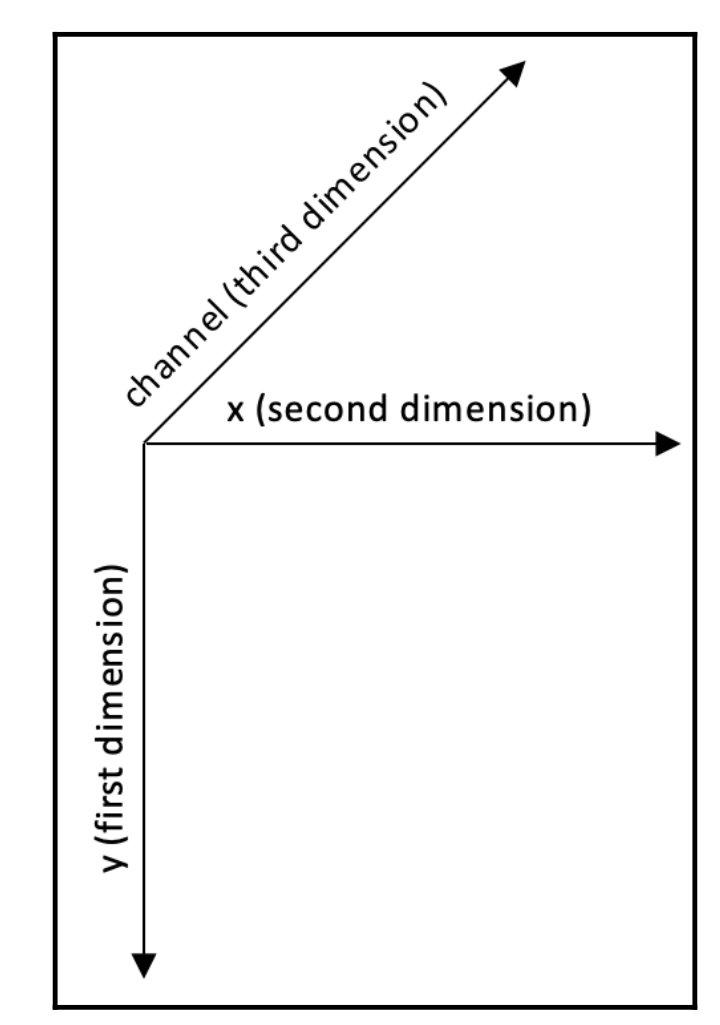

For example, in an 8-bit grayscale image with a white pixel in the upper-left corner, image`[0, 0]` is 255. For a 24-bit (8-bit-per-channel) BGR image with a blue pixel in the upper-left corner, image`[0, 0]` is `[255, 0, 0]`.
Provided that an image has 8 bits per channel, we can cast it to a standard Python `bytearray` object, which is one-dimensional:

Conversely, provided that bytearray contains bytes in an appropriate order, we can cast and then reshape it to get a numpy.array type that is an image:

Conversely, provided that bytearray contains bytes in an appropriate order, we can cast and then reshape it to get a numpy.array type that is an image:
```Python
grayImage = numpy.array(grayByteArray).reshape(height, width)
bgrImage = numpy.array(bgrByteArray).reshape(height, width, 3)
```

As a more complete example, let's convert bytearray that contains random bytes into a grayscale image and a BGR image:

# Accessing image data with numpy.array

We already know that the easiest (and most common) way to load an image in OpenCV is to use the `imread` function. We also know that this will return an image, which is really an array (either a 2D or 3D one, depending on the parameters you passed to imread).

The `numpy.array` class is greatly optimized for array operations, and it allows certain kinds of bulk manipulations that are not available in a plain Python list. These kinds of `numpy.array` type-specific operations come in handy for image manipulations in OpenCV. However, let's explore image manipulations step by step, starting with a basic example. Say you want to manipulate a pixel at coordinates (0, 0) in a BGR image and turn it into a white pixel:

If you then save the modified image to file and view it, you will see a white dot in the top-left corner of the image. Naturally, this modification is not very useful, but it begins to show the possibilities. Now, let's leverage the capabilities of `numpy.array` to perform transformations on an array much faster than we could do with a plain Python list.

Let's say that you want to change the blue value of a particular pixel, say, the pixel at coordinates, (150, 120). The `numpy.array` type provides a handy method, `item`, which takes three parameters: the x (or left) position, the y (or top) position, and the index within the array at the (x, y) position (remember that in a BGR image, the data at a certain position is a three-element array containing the B, G, and R values in this order) and returns the value at the index position. Another method, `itemset`, sets the value of a particular channel of a particular pixel to a specified value. `itemset` takes two arguments: a three- element tuple (x, y, and index) and the new value.

In the following example, we change the value of the blue channel at (150, 120) from its current value to an arbitrary 255:

For modifying a single element in an array, the `itemset` method is somewhat faster than the indexing syntax that we saw in the first example in this section.

Again, modifying an element of an array does not do much in itself, but it does open a world of possibilities. However, for performance reasons, this is only suitable for small regions of interest. When you need to manipulate an entire image or a large region of interest, it is advisable that you utilize either OpenCV's functions or NumPy's array slicing. 
The latter allows you to specify a range of indices. Let's consider an example of using **array slicing** to manipulate color channels. Setting all G (green) values of an image to 0 is as simple as the following code:

This piece of code performs a fairly significant operation and is easy to understand. The relevant line is the last one, which basically instructs the program to take all pixels from all rows and columns and set the green value (at index one of the three-element BGR array) to 0. If you display this image, you will notice a complete absence of green. 

There are several interesting things we can do by accessing raw pixels with NumPy's array slicing; one of them is defining **regions of interests (ROI)**. Once the region is defined, we can perform a number of operations. For example, we can bind this region to a variable, define a second region, and assign the value of the first region to the second (hence, copying a portion of the image over to another position in the image):

It is important to make sure that the two regions correspond in terms of size. If not, NumPy will (rightly) complain that the two shapes are mismatched.

Finally, we can access the properties of numpy.array, as shown in the following code:

# Reading/writing a video file

OpenCV provides the `VideoCapture` and `VideoWriter` classes, which support various video file formats. The supported formats vary depending on the operating system and the build configuration of OpenCV, but normally it is safe to assume that the AVI format is supported. Via its `read` method, a `VideoCapture` object may be polled for new frames until it reaches the end of its video file. Each frame is an image in a BGR format.

Conversely, an image may be passed to the `write` method of the `VideoWriter` class, which appends the image to a file in VideoWriter. Let's look at an example that reads frames from one AVI file and writes them to another with a YUV encoding:

The arguments to the constructor of the VideoWriter class deserve special attention. A video's filename must be specified. Any preexisting file with this name is overwritten. A video codec must also be specified. The available codecs may vary from system to system. The supported options may include the following:

* `0`: This option is an uncompressed raw video file. The file extension should be .avi.
* `cv2.VideoWriter_fourcc('I','4','2','0')`: This option is an uncompressed YUV encoding, 4:2:0 chroma subsampled. This encoding is widely compatible but produces large files. The file extension should be .avi.
* `cv2.VideoWriter_fourcc('P','I','M','1')`: This option is MPEG-1. The file extension should be .avi.
* `cv2.VideoWriter_fourcc('X','V','I','D')`: This option is a relatively old MPEG-4 encoding. It is a good option if you want to limit the size of the resulting video. The file extension should be .avi.
* `cv2.VideoWriter_fourcc('M','P','4','V')`: This option is another relatively old MPEG-4 encoding. It is a good option if you want to limit the size of the resulting video. The file extension should be .mp4.
* `cv2.VideoWriter_fourcc('X','2','6','4')`: This option is a relatively new MPEG-4 encoding. It may be the best option if you want to limit the size of the resulting video. The file extension should be .mp4.
* `cv2.VideoWriter_fourcc('T','H','E','O')`: This option is Ogg Vorbis. The file extension should be .ogv.
* `cv2.VideoWriter_fourcc('F','L','V','1')`: This option is a Flash video. The file extension should be .flv.

# Capturing camera frames

A stream of camera frames is represented by a VideoCapture object too. However, for a camera, we construct a VideoCapture object by passing the camera's device index instead of a video's filename. Let's consider the following example, which captures 10 seconds of video from a camera and writes it to an AVI file. The code is similar to the previous section's sample (which was captured from a video file instead of a camera) but changes are marked in bold:

The read method is inappropriate when we need to synchronize either a set of cameras or a
multihead camera such as a stereo camera. Then, we use the grab and retrieve methods
instead. For a set of two cameras, we can use code similar to the following:
```Python
success0 = cameraCapture0.grab()
success1 = cameraCapture1.grab()
if success0 and success1:
    frame0 = cameraCapture0.retrieve()
    frame1 = cameraCapture1.retrieve()
```

# Displaying an image in a window

One of the most basic operations in OpenCV is displaying an image in a window. This can be done with the imshow function. If you come from any other GUI framework background, you might think it sufficient to call `imshow` to display an image. However, in OpenCV, the window is drawn (or re-drawn) only when you call another function,
waitKey. The latter function pumps the window's event queue (allowing various events
such as drawing to be handled), and it returns the keycode of any key that the user may
have typed within a specified timeout. To some extent, this rudimentary design simplifies
the task of developing demos that use video or webcam input; at least the developer has
manual control over the capture and display of new frames.

# Displaying camera frames in a window

OpenCV allows named windows to be created, redrawn, and destroyed using the `namedWindow`, `imshow`, and `destroyWindow` functions. Also, any window may capture keyboard input via the `waitKey` function and mouse input via the `setMouseCallback` function. Let's look at an example where we show the frames captured from a live camera:

The mouse callback passed to `setMouseCallback` should take five arguments, as seen in our code sample. The callback's `param` argument is set as an optional third argument to `setMouseCallback`. By default, it is 0. The callback's event argument is one of the following actions:

* `cv2.EVENT_MOUSEMOVE`: This event refers to mouse movement.
* `cv2.EVENT_LBUTTONDOWN`: This event refers to the left button going down when it is pressed.
* `cv2.EVENT_RBUTTONDOWN`: This event refers to the right button going down when it is pressed.
* `cv2.EVENT_MBUTTONDOWN`: This event refers to the middle button going down when it is pressed.
* `cv2.EVENT_LBUTTONUP`: This event refers to the left button coming back up when it is released.
* `cv2.EVENT_RBUTTONUP`: This event refers to the right button coming back up when it is released.
* `cv2.EVENT_MBUTTONUP`: This event refers to the middle button coming back up when it is released.
* `cv2.EVENT_LBUTTONDBLCLK`: This event refers to the left button being double- clicked.
* `cv2.EVENT_RBUTTONDBLCLK`: This event refers to the right button being double- clicked.
* `cv2.EVENT_MBUTTONDBLCLK`: This event refers to the middle button being double-clicked.

The mouse callback's flags argument may be some bitwise combination of the following
events:

* `cv2.EVENT_FLAG_LBUTTON`: This event refers to the left button being pressed.
* `cv2.EVENT_FLAG_RBUTTON`: This event refers to the right button being pressed.
* `cv2.EVENT_FLAG_MBUTTON`: This event refers to the middle button being pressed.
* `cv2.EVENT_FLAG_CTRLKEY`: This event refers to the Ctrl key being pressed.
* `cv2.EVENT_FLAG_SHIFTKEY`: This event refers to the Shift key being pressed.
* `cv2.EVENT_FLAG_ALTKEY`: This event refers to the Alt key being pressed.